#  01 – EDA: Raw Data

# 1.Load raw Telco churn dataset
# 2.Explore schema, types, distributions
# 3.Inspect key categorical and numeric variables
# 4.This notebook is **read-only / analysis-only**: no modification of source CSVs

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

## 1. Load Raw Data

In [434]:
# Use relative paths so it works on GitHub/other machines
RAW_PATH = "../data/raw/telco-Customer-Churn.csv"

df_raw = pd.read_csv(RAW_PATH)

print("Raw data shape:", df_raw.shape)
df_raw.head()

Raw data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [435]:
print("Raw data count (non-null per column):")
print(df_raw.count())

Raw data count (non-null per column):
customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64


## 2. Basic Schema & Types

In [436]:
print("RAW DATA TYPES:\n")
print(df_raw.dtypes)

RAW DATA TYPES:

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [437]:
print("\nRAW DATA INFO:\n")
df_raw.info()


RAW DATA INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [438]:
print("\nRAW DATA DESCRIPTION (numeric + categorical):\n")
df_raw.describe(include="all")


RAW DATA DESCRIPTION (numeric + categorical):



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 3. Helper Functions for Quick Inspection

In [439]:
def print_unique_values_in_df(df, max_cols=20, max_values=20):
    """
    Print unique values for object/category columns.
    Limit the number of columns/values printed to keep it readable.
    """
    obj_cols = [c for c in df.columns if df[c].dtype == "object"]
    print(f"\nObject columns (showing up to {max_cols} columns): {len(obj_cols)} total\n")
    for col in obj_cols[:max_cols]:
        unique_vals = df[col].unique()
        n_unique = len(unique_vals)
        print(f"Column: {col}  |  n_unique = {n_unique}")
        print("  Sample unique values:", unique_vals[:max_values])
        print("-" * 60)

def plot_missing_bar(df, title):
    missing_counts = df.isna().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
    if missing_counts.empty:
        print(f"No missing values in {title}.")
        return
    plt.figure(figsize=(10, 4))
    missing_counts.plot(kind="bar")
    plt.title(f"Missing Values per Column – {title}")
    plt.ylabel("Count of missing values")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def plot_numeric_distributions(df, numeric_cols, title_prefix="", bins=30):
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col], bins=bins, kde=False)
        plt.title(f"{title_prefix}Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

def plot_boxplots(df, numeric_cols, title_prefix=""):
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"{title_prefix}Boxplot of {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


## 4. Raw Data - Unique Values for Categorical Columns

In [440]:
print_unique_values_in_df(df_raw, max_cols=25, max_values=20)


Object columns (showing up to 25 columns): 18 total

Column: customerID  |  n_unique = 7043
  Sample unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU'
 '9763-GRSKD' '7469-LKBCI' '8091-TTVAX' '0280-XJGEX' '5129-JLPIS'
 '3655-SNQYZ' '8191-XWSZG' '9959-WOFKT' '4190-MFLUW' '4183-MYFRB']
------------------------------------------------------------
Column: gender  |  n_unique = 2
  Sample unique values: ['Female' 'Male']
------------------------------------------------------------
Column: Partner  |  n_unique = 2
  Sample unique values: ['Yes' 'No']
------------------------------------------------------------
Column: Dependents  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: PhoneService  |  n_unique = 2
  Sample unique values: ['No' 'Yes']
------------------------------------------------------------
Column: MultipleLines

## 5. Raw Data - Target Variable ('Churn') Distribution

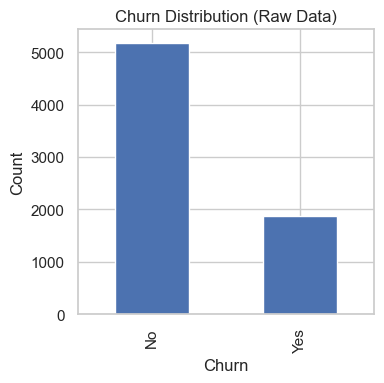

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [441]:
if "Churn" in df_raw.columns:
    plt.figure(figsize=(4, 4))
    df_raw["Churn"].value_counts().plot(kind="bar")
    plt.title("Churn Distribution (Raw Data)")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    print(df_raw["Churn"].value_counts(normalize=True))
else:
    print("Column 'Churn' not found in raw data.")

## 6. Raw Data – Numeric Columns: Distributions & Basic Stats

In [442]:
# Make sure TotalCharges is numeric if it's not already
if "TotalCharges" in df_raw.columns:
    df_raw["TotalCharges"] = pd.to_numeric(df_raw["TotalCharges"], errors="coerce")

# Make sure SeniorCitizen is categorical/object , showing as numeric
if "SeniorCitizen" in df_raw.columns:
    df_raw["SeniorCitizen"] = df_raw["SeniorCitizen"].astype("object")

numeric_cols_raw = df_raw.select_dtypes(include=["number"]).columns.tolist()
print("Numeric columns (raw):", numeric_cols_raw)

df_raw[numeric_cols_raw].describe()

Numeric columns (raw): ['tenure', 'MonthlyCharges', 'TotalCharges']


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


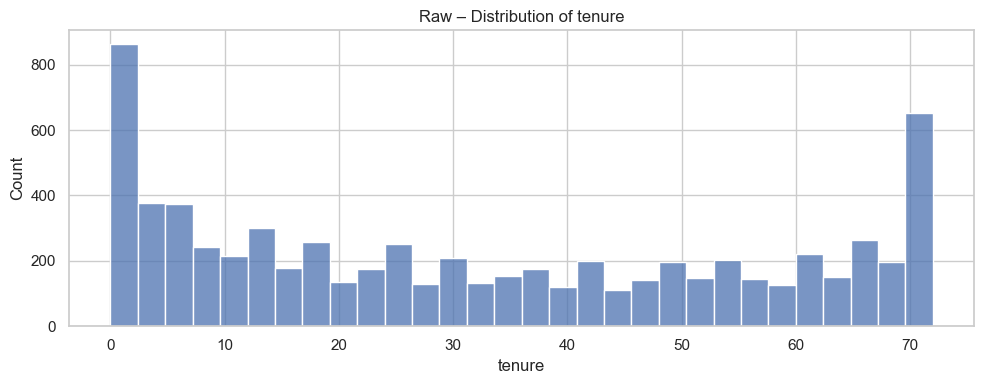

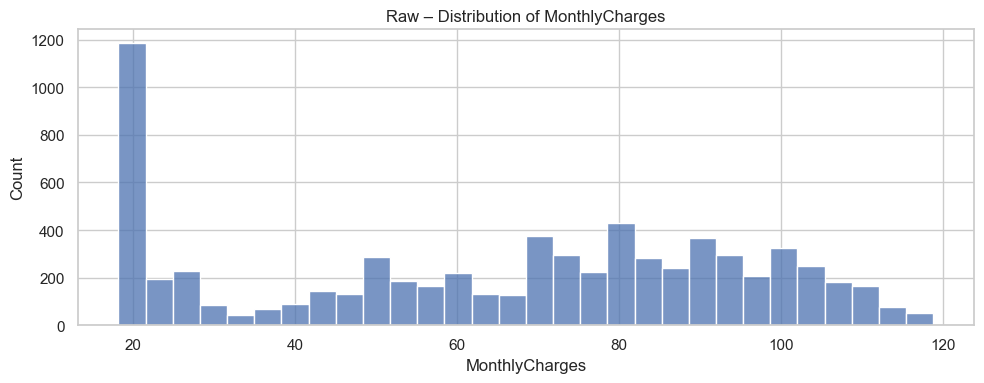

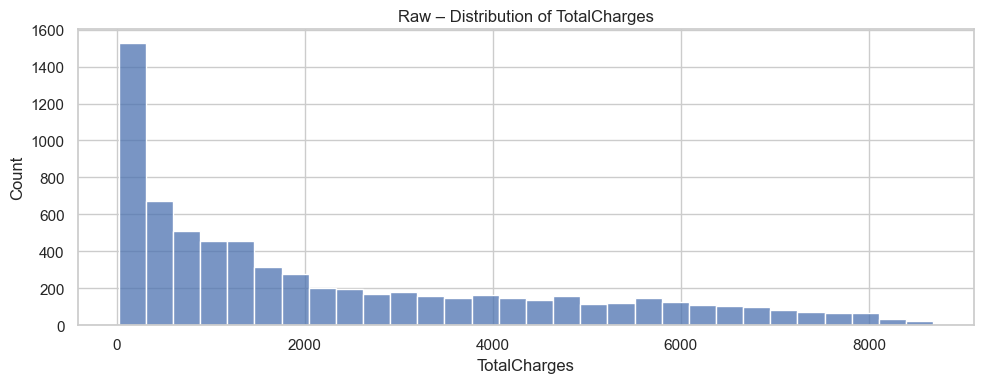

In [443]:
plot_numeric_distributions(df_raw, numeric_cols_raw, title_prefix="Raw – ")

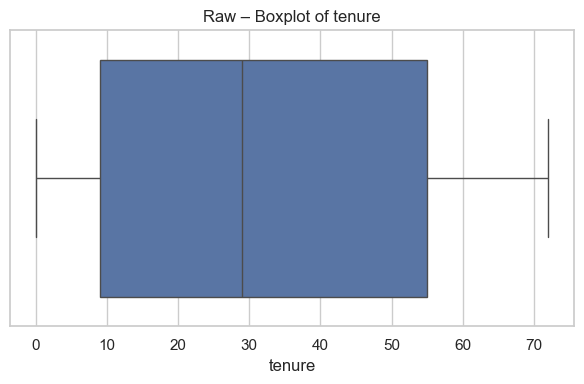

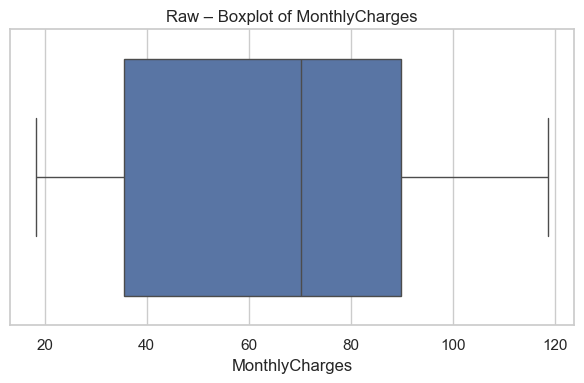

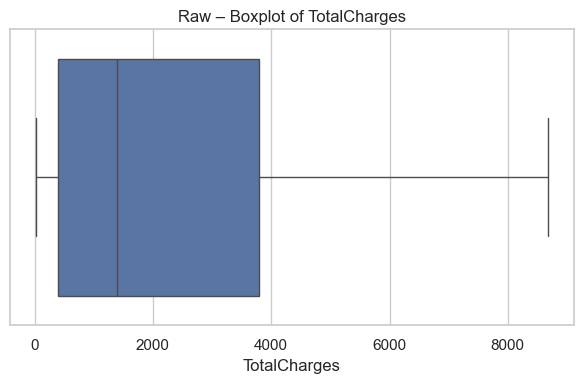

In [444]:
plot_boxplots(df_raw, numeric_cols_raw, title_prefix="Raw – ")

## 7. Raw Data – Churn vs Key Features

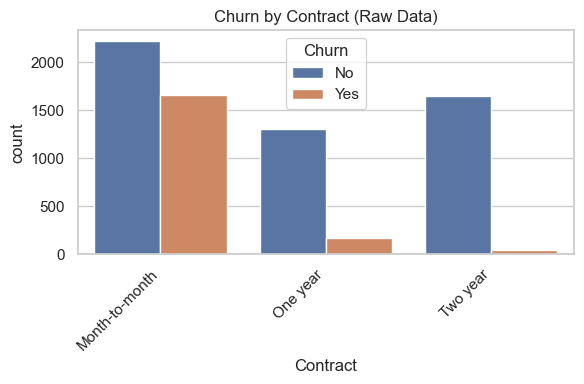

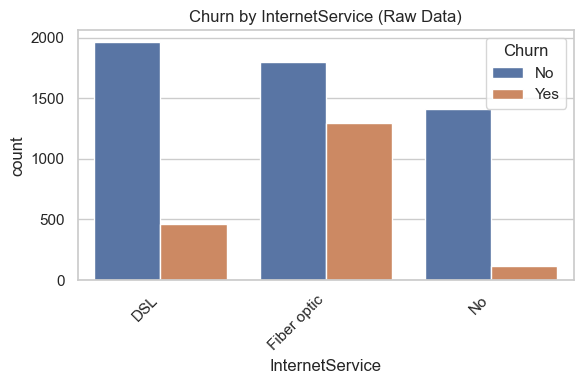

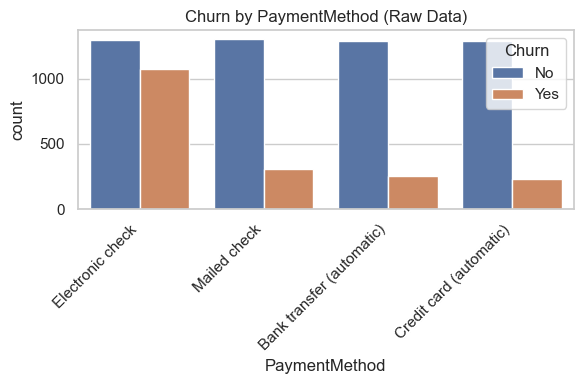

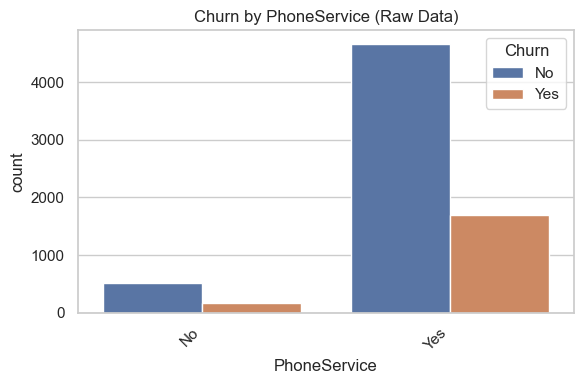

In [445]:
key_cat_cols = ["Contract", "InternetService", "PaymentMethod", "PhoneService"]
for col in key_cat_cols:
    if col in df_raw.columns and "Churn" in df_raw.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_raw, x=col, hue="Churn")
        plt.title(f"Churn by {col} (Raw Data)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

## 8. Raw Data – Missingness Overview


Missing values per column in RAW data:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


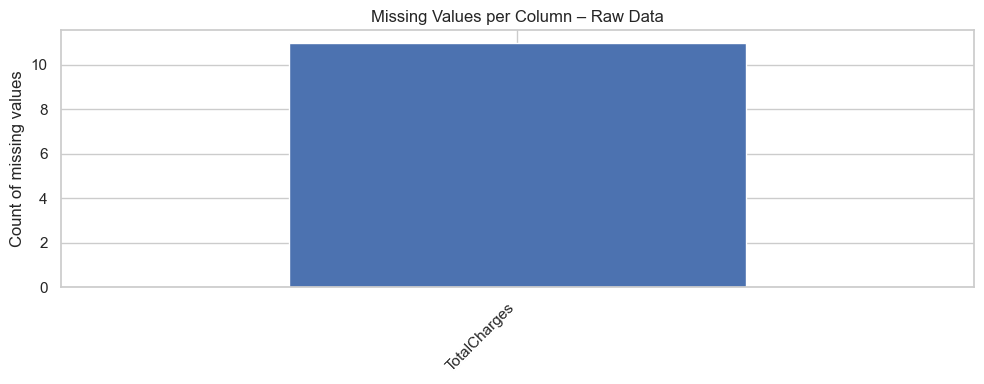

In [446]:
print("Missing values per column in RAW data:")
print(df_raw.isna().sum())

plot_missing_bar(df_raw, title="Raw Data")

## 9. Numeric Correlations (Raw Data)

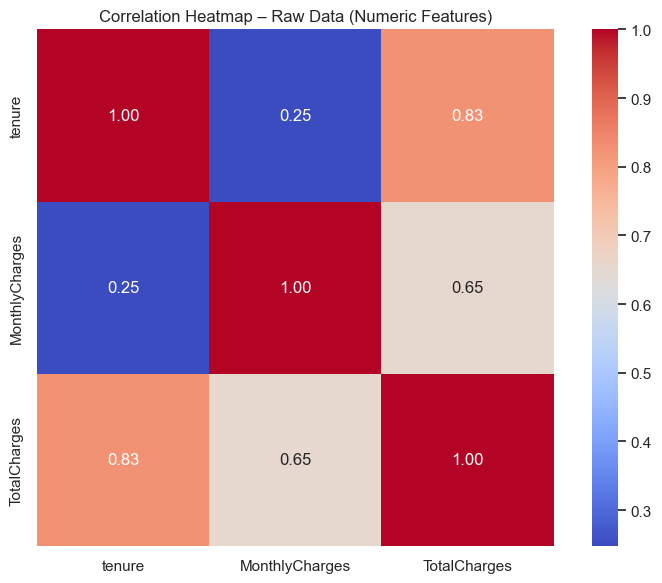

In [447]:
if len(numeric_cols_raw) > 1:
    plt.figure(figsize=(8, 6))
    corr = df_raw[numeric_cols_raw].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap – Raw Data (Numeric Features)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")